Rq: l'idée est d'utiliser une image IRM de faire une segmentation des tissus cérébraux
1. on commence par rendre l'image en niveau de gris
2. puis on affiche l'histogramme de l'image
3. On se fixe 3 classes pour la segmentation: matiere blanche matiere grise et liquide csf,
4. On observe sur l'histogramme le fond en noir et le reste de l'image en niveau de gris
5. avec des seuils de l'histogramme 15, 70, 150 on fait un seuillage pour retrouver les 3 tissus
6. On calcule le ration mb/(mg+mb+csf), mg/(mg+mb+csf),csf/(mg+mb+csf) pour un controle de dégénéressance cérébrale dans le temps ou d'autre maladie

RQ: je voulais ajouter une petite partie ou on applique un masque binaire pour enlecer le crane mais je ne suis pas arrivée é avoir ce masque ( à discuter)


In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.image import imread 

In [173]:
image = imread('Desktop/no_skull.jpeg')
#image = imread('Desktop/tunmor.jpg')
#image = imread('Desktop/T1.jpg')

In [174]:
image.shape

(320, 260, 3)

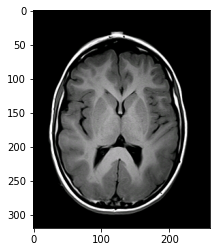

In [175]:
plt.imshow(image);

In [176]:
def rgb2gray(rgb):
    gray = np.zeros((rgb.shape[0],rgb.shape[1]),dtype='uint16')
    for i in range(rgb.shape[0]):
        for j in range(rgb.shape[1]):
            gray[i,j] = ((1/3)*rgb[i,j,0]+(1/3)*rgb[i,j,1]+(1/3)*rgb[i,j,2])
            
    return gray


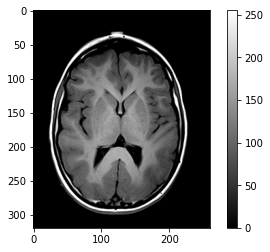

In [177]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray');
plt.colorbar();


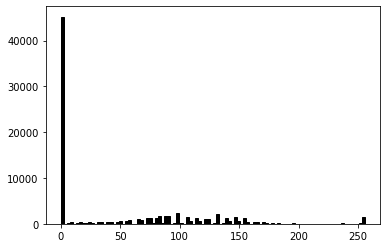

In [178]:
plt.hist(gray.ravel(), bins=100, range=(0.0, 256), fc='k', ec='k');

In [169]:
gm = gray.copy()*0
wm = gray.copy()*0
csf = gray.copy()*0

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if 70<=gray[i,j]<150:
            gm [i,j] = 1
            wm [i,j] = 0
            csf[i,j] = 0
        elif 15<=gray[i,j]<70:
            csf[i,j] = 1
            gm [i,j] = 0
            wm [i,j] = 0
        elif gray[i,j]>=150:
            gm [i,j] = 0
            wm [i,j] = 1
            csf[i,j] = 0
        else:
            gm [i,j] = 0
            wm [i,j] = 0
            csf[i,j] = 0



print(i,j)  
#plt.imshow(mask1,cmap = plt.get_cmap('gray'))
#max(np.ravel(gray1))

242 206


In [170]:
gm = gm * 3
wm = wm * 2
all = gm+csf+wm
max(np.ravel(all))

3

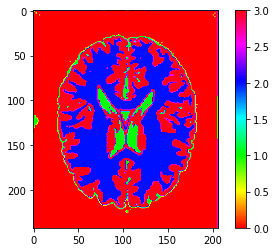

In [171]:
plt.imshow(all, cmap='hsv');
plt.colorbar();